# Bike Sharing Dataset

=========================================
Data Set
=========================================

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 


=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count daily based on the environmental and seasonal settings.

In [1]:
raw <- read.csv("day.csv")
dataset <- subset(raw, select= -c(instant, dteday, casual, registered ))

In [3]:
library(dplyr)
glimpse(dataset)

Rows: 731
Columns: 12
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ yr         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ mnth       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...
$ weekday    <int> 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,...
$ workingday <int> 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,...
$ weathersit <int> 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,...
$ temp       <dbl> 0.3441670, 0.3634780, 0.1963640, 0.2000000, 0.2269570, 0...
$ atemp      <dbl> 0.3636250, 0.3537390, 0.1894050, 0.2121220, 0.2292700, 0...
$ hum        <dbl> 0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.5182...
$ windspeed  <dbl> 0.1604460, 0.2485390, 0.2483090, 0.1602960, 0.1869000, 0...
$ cnt        <int> 985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822, 1321, ...


In [4]:
is.null(dataset)

[1] FALSE

In [5]:
# Encoding Catagorical Variable
dataset$season <- factor(dataset$season,
                         levels=c(1,2,3,4),
                         labels=c(1,2,3,4))
dataset$yr <- factor(dataset$yr,
                     levels=c(0,1),
                     labels=c(0,1))
dataset$mnth <- factor(dataset$mnth,
                       levels=c(1,2,3,4,5,6,7,8,9,10,11,12),
                       labels=c(1,2,3,4,5,6,7,8,9,10,11,12))
dataset$holiday <- factor(dataset$holiday,
                          levels=c(0,1),
                          labels=c(0,1))
dataset$weekday <- factor(dataset$weekday,
                          levels=c(0,1,2,3,4,5,6),
                          labels=c(0,1,2,3,4,5,6))
dataset$workingday <- factor(dataset$workingday,
                             levels=c(0,1),
                             labels=c(0,1))
dataset$weathersit <- factor(dataset$weathersit,
                             levels=c(1,2,3),
                             labels=c(1,2,3))

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.0     v stringr 1.4.0
v tidyr   1.1.0     v forcats 0.5.0
v readr   1.3.1     
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overw

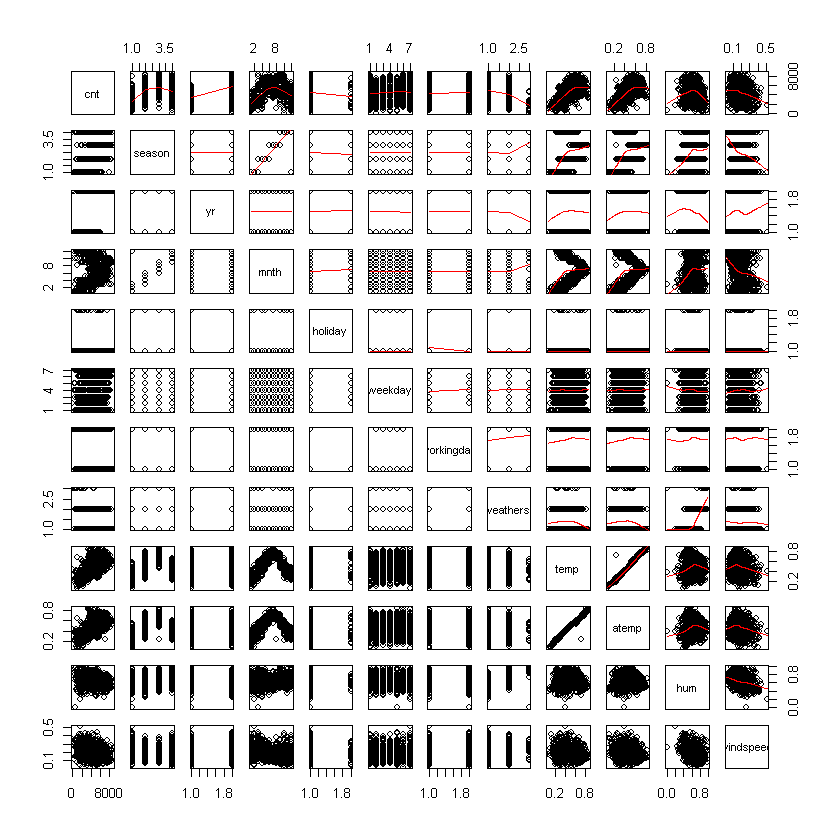

In [6]:
library(tidyverse)
library(GGally)
pairs(cnt~., data= dataset, upper.panel= panel.smooth)

### Train Test Split

In [7]:
# Total number of rows in the dataset
n <- nrow(dataset)
# Number of rows for the training set (80% of the dataset)
n_train <- round(0.80*n)
# Set a random seed for reproducibility
set.seed(123)

In [8]:
# create a vector of indices which is an 80% random sample
train_indices <- sample(1:n, n_train)

# Subset the data frame to training indices only
train_set <- dataset[train_indices, ]

#Exclude the training indices to create the test set
test_set <- dataset[-train_indices, ]

# Regression Tree

In [9]:
library(rpart)
regressor <- rpart(formula = cnt~.,
                   data= train_set,
                   control = rpart.control(minsplit = 5),
                   method= "anova")

# Look at the model output                      
print(regressor)

n= 585 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 585 2140595000.0 4536.598  
   2) temp< 0.432373 240  527376400.0 3102.171  
     4) yr=0 124  129321300.0 2248.524  
       8) season=1,2 85   28532480.0 1737.753 *
       9) season=4 39   30282360.0 3361.744 *
     5) yr=1 116  211102600.0 4014.690  
      10) atemp< 0.274006 34   21876740.0 2575.912 *
      11) atemp>=0.274006 82   89659990.0 4611.256  
        22) season=1 33   19356390.0 3847.758 *
        23) season=2,4 49   38111590.0 5125.449 *
   3) temp>=0.432373 345  775871700.0 5534.461  
     6) yr=0 166  112304100.0 4348.253  
      12) weathersit=3 5     496603.2 2277.600 *
      13) weathersit=1,2 161   89703680.0 4412.559 *
     7) yr=1 179  213377700.0 6634.520  
      14) hum>=0.771458 22   52841300.0 5267.318  
        28) weekday=1 4   15410100.0 3098.500 *
        29) weekday=0,2,3,4,5,6 18   14434980.0 5749.278 *
      15) hum< 0.771458 157  113650600.0 6826.102 *


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

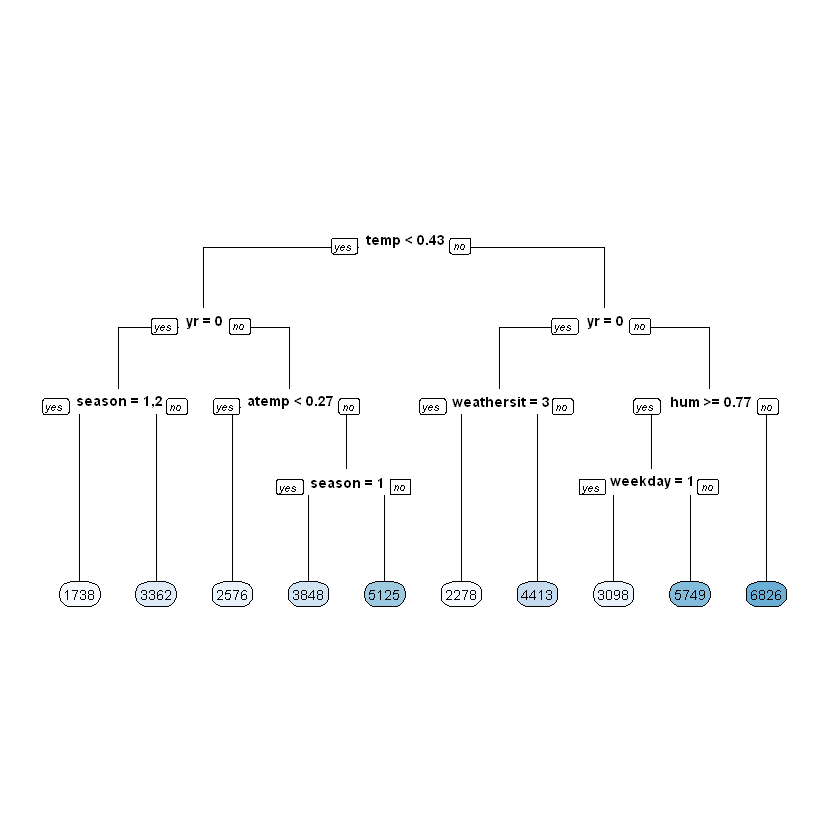

In [10]:
# Plot the tree model
library(rpart.plot)
rpart.plot(x = regressor, yesno = 2, type = 0, extra = 0)

In [12]:
library(Metrics)
# Compute the RMSE
paste("Train Accuracy : ", rmse(actual= train_set$cnt, predicted= predict(object= regressor, data = train_set)))
paste("Test Accuracy : ", rmse(actual= test_set$cnt, predicted= predict(object= regressor, newdata = test_set)))

Warning message:
"package 'Metrics' was built under R version 3.6.3"

[1] "Train Accuracy :  797.27692755204"

[1] "Test Accuracy :  1047.95226120479"

## Prune the Regression Tree

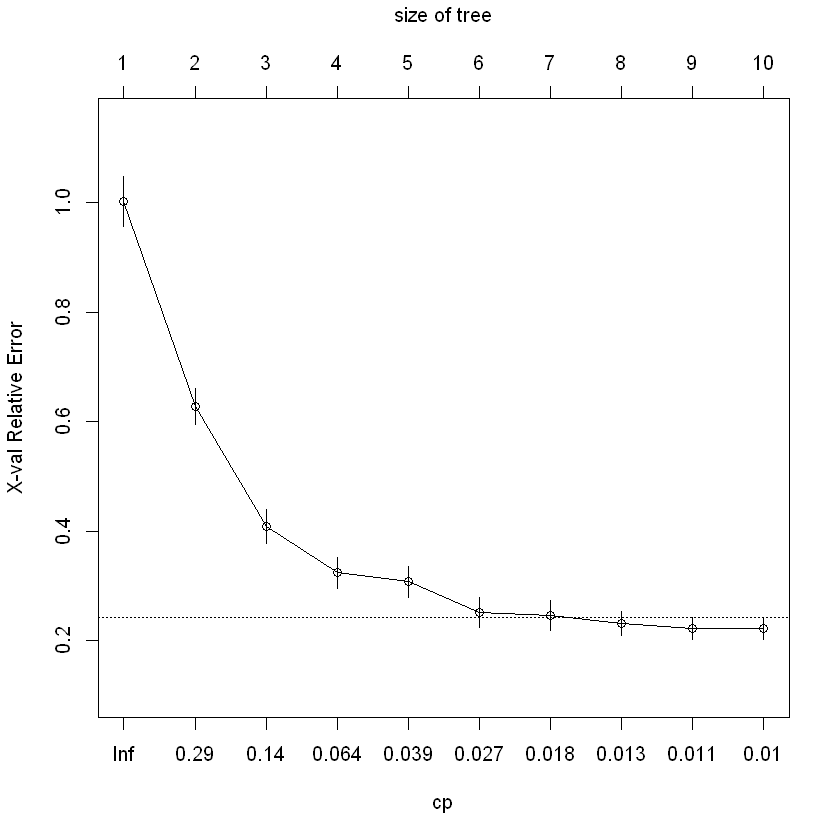

In [13]:
# Plot the "CP Table"
plotcp(regressor)

In [14]:
# Print the "CP Table"
print(regressor$cptable)

           CP nsplit rel error    xerror       xstd
1  0.39117472      0 1.0000000 1.0024715 0.04587196
2  0.21031068      1 0.6088253 0.6276020 0.03277104
3  0.08733670      2 0.3985146 0.4078053 0.03102475
4  0.04651319      3 0.3111779 0.3241047 0.02815131
5  0.03293779      4 0.2646647 0.3077112 0.02817246
6  0.02190315      5 0.2317269 0.2510496 0.02699070
7  0.01503882      6 0.2098238 0.2457643 0.02718921
8  0.01074291      7 0.1947849 0.2308220 0.02206004
9  0.01032601      8 0.1840420 0.2222469 0.02084889
10 0.01000000      9 0.1737160 0.2222469 0.02084889


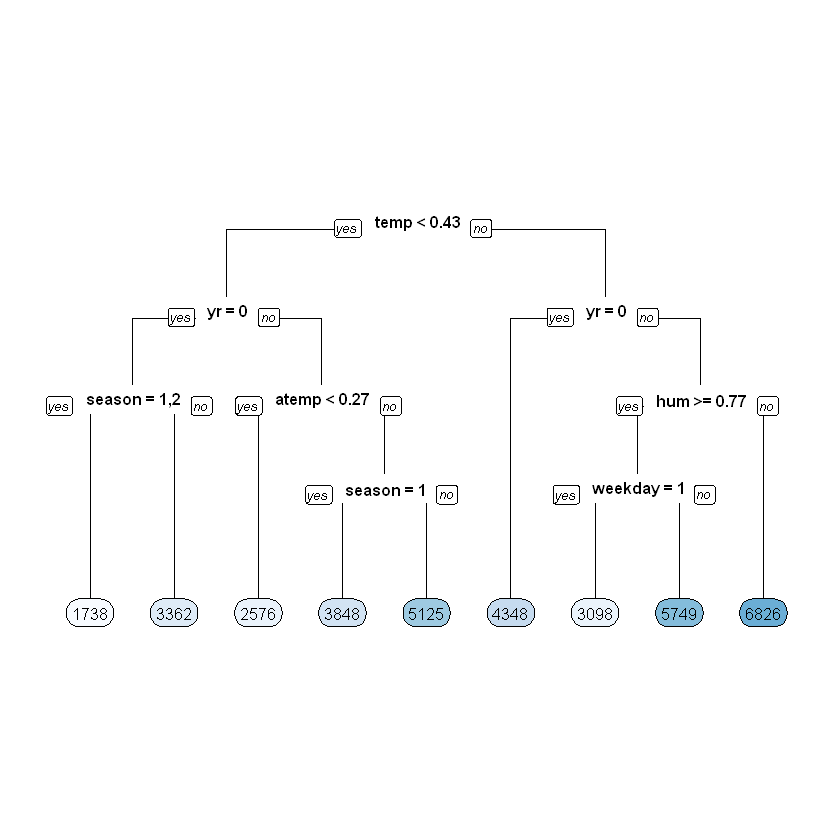

In [15]:
# Retrieve optimal cp value based on cross-validated error
opt_index <- which.min(regressor$cptable[, "xerror"])
cp_opt <- regressor$cptable[opt_index, "CP"]

# Prune the model (to optimized cp value)
regressor_opt <- prune(tree = regressor, 
                       cp = cp_opt)
library(rpart.plot)
rpart.plot(x = regressor_opt, yesno = 2, type = 0, extra = 0)

In [16]:
#finding RMSE
paste("Train Accuracy : ", rmse(actual= train_set$cnt, predicted= predict(object= regressor_opt, data = train_set)))
paste("Test Accuracy : ", rmse(actual= test_set$cnt, predicted= predict(object= regressor_opt, newdata = test_set)))

[1] "Train Accuracy :  820.630712745342"

[1] "Test Accuracy :  1082.09894721863"

## Grid Search for minsplit and Maxdepth

In [18]:
# Establish a list of possible values for minsplit and maxdepth
minsplit <- seq(1, 5, 1)
maxdepth <- seq(1, 9, 1)

# Create a data frame containing all combinations 
hyper_grid <- expand.grid(minsplit = minsplit, maxdepth = maxdepth)

# Check out the grid
head(hyper_grid)

minsplit,maxdepth
1,1
2,1
3,1
4,1
5,1
1,2


In [22]:
# Number of potential models in the grid
num_models <- nrow(hyper_grid)

# Create an empty list to store models
grade_models <- list()

# Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:num_models) {
  
  # Get minsplit, maxdepth values at row i
  minsplit <- hyper_grid$minsplit[i]
  maxdepth <- hyper_grid$maxdepth[i]
  
  # Train a model and store in the list
  grade_models[[i]] <- rpart(formula = cnt ~ ., 
                             data = train_set, 
                             method = "anova",
                             minsplit = minsplit,
                             maxdepth = maxdepth)
}

In [23]:
# Number of potential models in the grid
num_models <- length(grade_models)

# Create an empty vector to store RMSE values
rmse_values <- c()

# Write a loop over the models to compute validation RMSE
for (i in 1:num_models) {
  
  # Retrieve the i^th model from the list
  model <- grade_models[[i]]
  
  # Generate predictions on grade_valid 
  pred <- predict(object = model,
                  newdata = test_set)
  
  # Compute validation RMSE and add to the 
  rmse_values[i] <- rmse(actual = test_set$cnt, 
                         predicted = pred)
}

In [24]:
# Identify the model with smallest validation set RMSE
best_model <- grade_models[[which.min(rmse_values)]]
best_model$control

$minsplit
[1] 2

$minbucket
[1] 1

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 3

$xval
[1] 10

In [25]:
# Compute test set RMSE on best_model
test_set2 <- test_set %>%
                select(cnt) %>%
                mutate(pred = predict(object = best_model,
                newdata = test_set))
rmse(actual = test_set2$cnt, 
     predicted = test_set2$pred)

[1] 1026.251

# Random Forest

In [27]:
# The outcome column
outcome <- "cnt"
# The input variables
vars <- c("season", "yr", "mnth", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed")
# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste("cnt", "~", paste(vars, collapse = " + ")))

[1] "cnt ~ season + yr + mnth + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

In [28]:
# Load the package ranger
library(ranger)
# Fit and print the random forest model
(bike_model_rf <- ranger(fmla, # formula 
                         train_set, # data
                         num.trees = 500, 
                         respect.unordered.factors = "order", 
                         seed = 454))

Warning message:
"package 'ranger' was built under R version 3.6.3"

Ranger result

Call:
 ranger(fmla, train_set, num.trees = 500, respect.unordered.factors = "order",      seed = 454) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      585 
Number of independent variables:  10 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       445403 
R squared (OOB):                  0.8784845 

In [29]:
# Make predictions on the test data
test_set1 <-test_set %>%
  mutate(pred = predict(bike_model_rf, test_set)$predictions)

# Calculate the RMSE
test_set1 %>% 
  mutate(residual = pred - cnt) %>%
  summarize(rmse  = sqrt(mean(residual^2)))

rmse
731.6069


In [30]:
library(caret)
library(tictoc)
library(randomForest)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ranger':

    importance

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [34]:
fitControl <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
tic()
mtry <- sqrt(ncol(train_set))
rf_model <- train(cnt~.,
                  data= train_set,
                  method= "rf",
                  trControl = fitControl,
                  verbose= FALSE)
toc()

215.19 sec elapsed


In [36]:
print(rf_model)

Random Forest 

585 samples
 11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 527, 527, 528, 525, 526, 527, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   7    680.3499  0.8807529  492.5440
  11    670.9993  0.8792747  475.9442
  16    669.4172  0.8784150  472.4210

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 16.


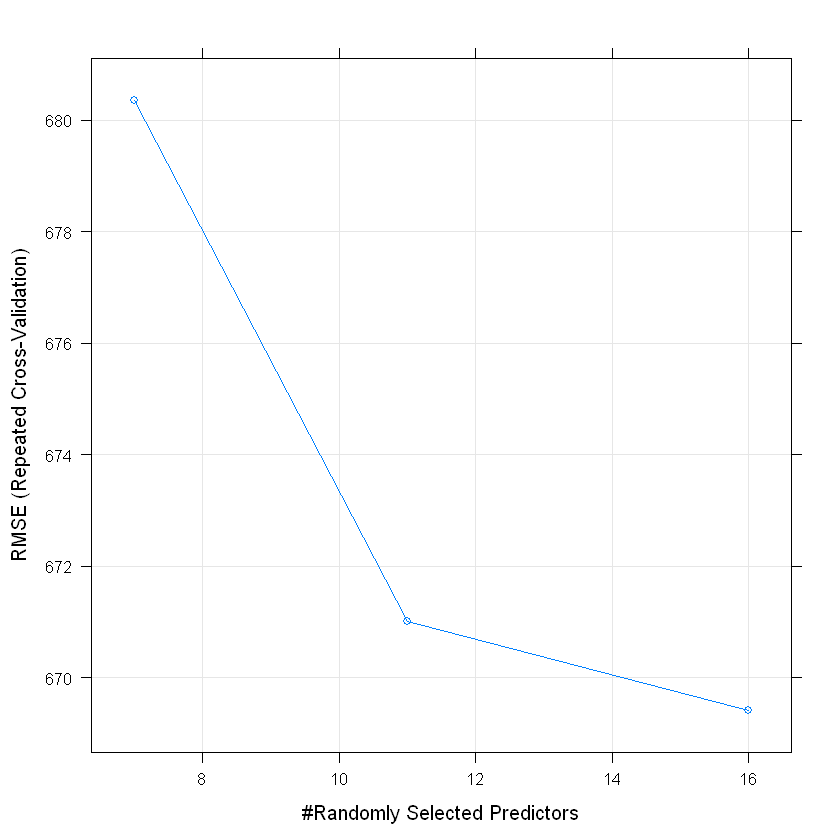

In [37]:
plot(rf_model)

mtry is 16 when rmse is least

### Using Grid Search

In [38]:
# Manual Search
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid")
tunegrid <- expand.grid(.mtry=c(sqrt(ncol(train_set))))
modellist <- list()
seed=123
metric <- "rmse"
for (ntree in c(50,100, 150, 200, 250)) {
  set.seed(seed)
  fit <- train(cnt~., data=train_set, method="rf",  tuneGrid=tunegrid, trControl=control, ntree=ntree)
  key <- toString(ntree)
  modellist[[key]] <- fit
}


Call:
summary.resamples(object = results)

Models: 50, 100, 150, 200, 250 
Number of resamples: 30 

MAE 
        Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
50  527.3676 614.7996 669.0395 660.0370 699.7687 817.9046    0
100 518.7988 615.3948 655.5480 654.5813 691.2412 811.5058    0
150 539.3049 611.7581 659.3244 654.9807 687.0623 813.2713    0
200 532.0947 612.7508 657.9820 654.7117 695.5891 809.7207    0
250 530.8526 611.6612 666.0118 657.0982 698.3651 808.8662    0

RMSE 
        Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
50  671.2477 768.5910 842.4749 840.9250 902.1686 1104.947    0
100 661.6882 763.7543 828.4129 834.4997 898.6940 1096.039    0
150 666.7581 762.4534 838.1076 832.5192 895.1630 1085.955    0
200 672.0319 768.3155 839.6741 832.8122 897.3270 1082.949    0
250 669.9277 764.3618 840.8251 835.2299 904.5272 1083.329    0

Rsquared 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
50  0.7320716 0.8294347 0.8514986 0.8450240 0.8738

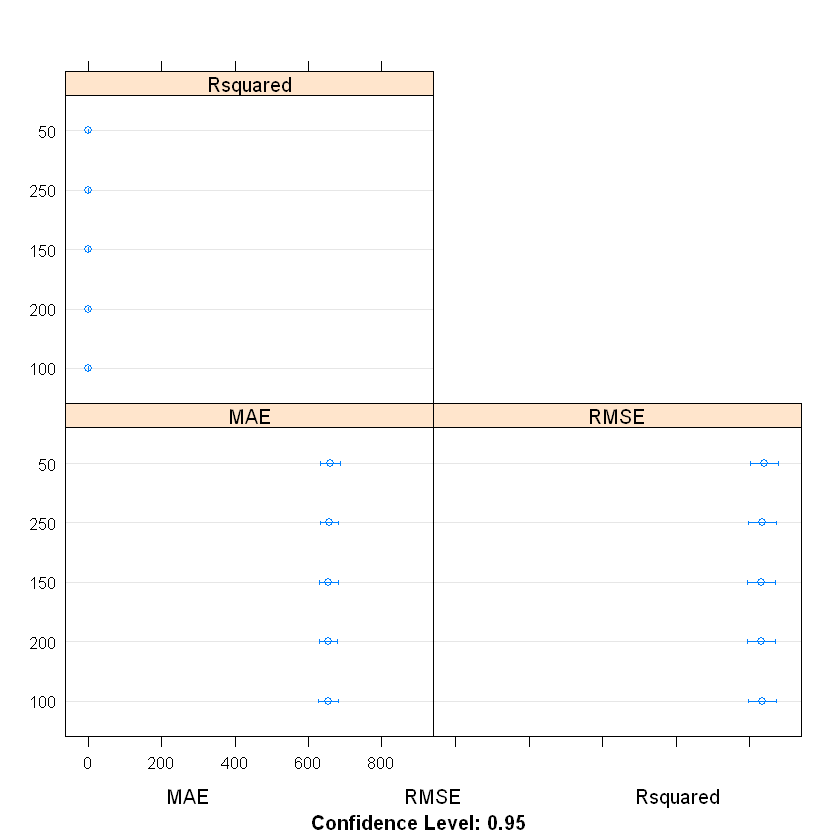

In [39]:
# compare results
results <- resamples(modellist)
summary(results)
dotplot(results)

In [41]:
# Fit the random forest using ntree=100


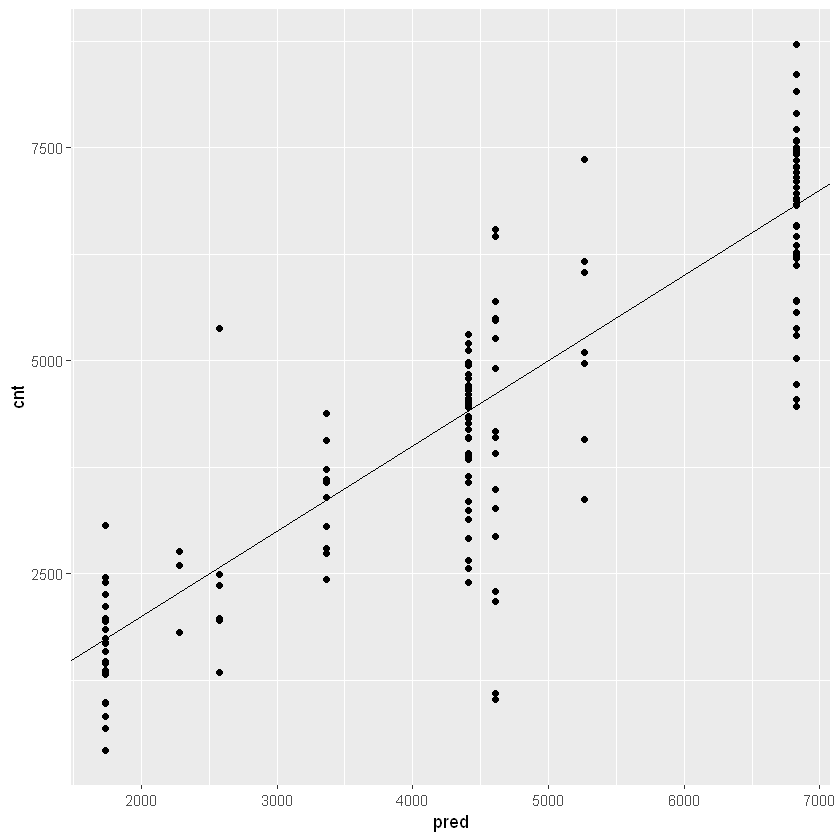

In [40]:
# Plot predictions vs actual bike rental count
ggplot(test_set2, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

# Xg-Boost

In [43]:
# Load the package vtreat
library(vtreat)
# Create the treatment plan
treatplan <- designTreatmentsZ(dataset, vars)

Warning message:
"package 'vtreat' was built under R version 3.6.3"Loading required package: wrapr
Warning message:
"package 'wrapr' was built under R version 3.6.3"
Attaching package: 'wrapr'

The following object is masked from 'package:tidyr':

    unpack

The following object is masked from 'package:tibble':

    view

The following object is masked from 'package:dplyr':

    coalesce



[1] "vtreat 1.6.0 inspecting inputs Thu Sep 10 15:26:07 2020"
[1] "designing treatments Thu Sep 10 15:26:07 2020"
[1] " have initial level statistics Thu Sep 10 15:26:07 2020"
[1] " scoring treatments Thu Sep 10 15:26:07 2020"
[1] "have treatment plan Thu Sep 10 15:26:07 2020"


In [44]:
library(dplyr)
library(magrittr) #for use_series function

Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



In [45]:
# Examine the scoreFrame
(scoreFrame <- treatplan %>%
    use_series(scoreFrame) %>%
    select(varName, origName, code))

varName,origName,code
season_catP,season,catP
mnth_catP,mnth,catP
weathersit_catP,weathersit,catP
temp,temp,clean
atemp,atemp,clean
hum,hum,clean
windspeed,windspeed,clean
season_lev_x_1,season,lev
season_lev_x_2,season,lev
season_lev_x_3,season,lev


In [46]:
# We only want the rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
    filter(code %in% c("clean", "lev")) %>%
    use_series(varName))

[1] "temp"               "atemp"              "hum"               
 [4] "windspeed"          "season_lev_x_1"     "season_lev_x_2"    
 [7] "season_lev_x_3"     "season_lev_x_4"     "yr_lev_x_0"        
[10] "yr_lev_x_1"         "mnth_lev_x_1"       "mnth_lev_x_10"     
[13] "mnth_lev_x_11"      "mnth_lev_x_12"      "mnth_lev_x_2"      
[16] "mnth_lev_x_3"       "mnth_lev_x_4"       "mnth_lev_x_5"      
[19] "mnth_lev_x_6"       "mnth_lev_x_7"       "mnth_lev_x_8"      
[22] "mnth_lev_x_9"       "holiday_lev_x_0"    "holiday_lev_x_1"   
[25] "workingday_lev_x_0" "workingday_lev_x_1" "weathersit_lev_x_1"
[28] "weathersit_lev_x_2" "weathersit_lev_x_3"

In [48]:
# Create the treated training data
train_set.treat <- prepare(treatplan, train_set, varRestriction = newvars)
head(train_set.treat)

temp,atemp,hum,windspeed,season_lev_x_1,season_lev_x_2,season_lev_x_3,season_lev_x_4,yr_lev_x_0,yr_lev_x_1,...,mnth_lev_x_7,mnth_lev_x_8,mnth_lev_x_9,holiday_lev_x_0,holiday_lev_x_1,workingday_lev_x_0,workingday_lev_x_1,weathersit_lev_x_1,weathersit_lev_x_2,weathersit_lev_x_3
0.280000,0.265788,0.515833,0.253112,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
0.437500,0.426129,0.254167,0.274871,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
0.744167,0.692558,0.634167,0.144283,0,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
0.710833,0.648367,0.437083,0.144287,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
0.680833,0.635104,0.476250,0.240667,0,0,1,0,1,0,...,1,0,0,1,0,0,1,1,0,0
0.617500,0.578929,0.700833,0.320908,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [49]:
# Use prepare() to one-hot-encode testframe
test_set.treat <- prepare(treatplan, test_set, varRestriction = newvars)

In [50]:
# Load the package xgboost
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [51]:
# Run xgb.cv
cv <- xgb.cv(data = as.matrix(train_set.treat), 
             label = train_set$cnt,
             nrounds = 100,
             nfold = 5,
             objective = "reg:squarederror",
             eta = 0.3,
             max_depth = 6,
             early_stopping_rounds = 10,
             verbose = 0   # silent
)

In [52]:
# Get the evaluation log
elog <- cv$evaluation_log

In [53]:
# Determine and print how many trees minimize training and test error
elog %>% 
  summarize(ntrees.train = which.min(train_rmse_mean),   # find the index of min(train_rmse_mean)
            ntrees.test  = which.min(test_rmse_mean)) # find the index of min(test_rmse_mean)

ntrees.train,ntrees.test
27,17


In [54]:
# The number of trees to use, as determined by xgb.cv
ntrees=17

In [55]:
# Run xgboost
bike_model_xgb <- xgboost(data = as.matrix(train_set.treat), # training data as matrix
                          label = train_set$cnt,  # column of outcomes
                          nrounds = ntrees,       # number of trees to build
                          objective = "reg:squarederror", # objective
                          eta = 0.3,
                          depth = 6,
                          verbose = 0  # silent
)

[15:29:53] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [56]:
# Make predictions for train dataset
train_set$pred <- predict(bike_model_xgb, as.matrix(train_set.treat))

[1] "Train accuracy:  197.877969285102"

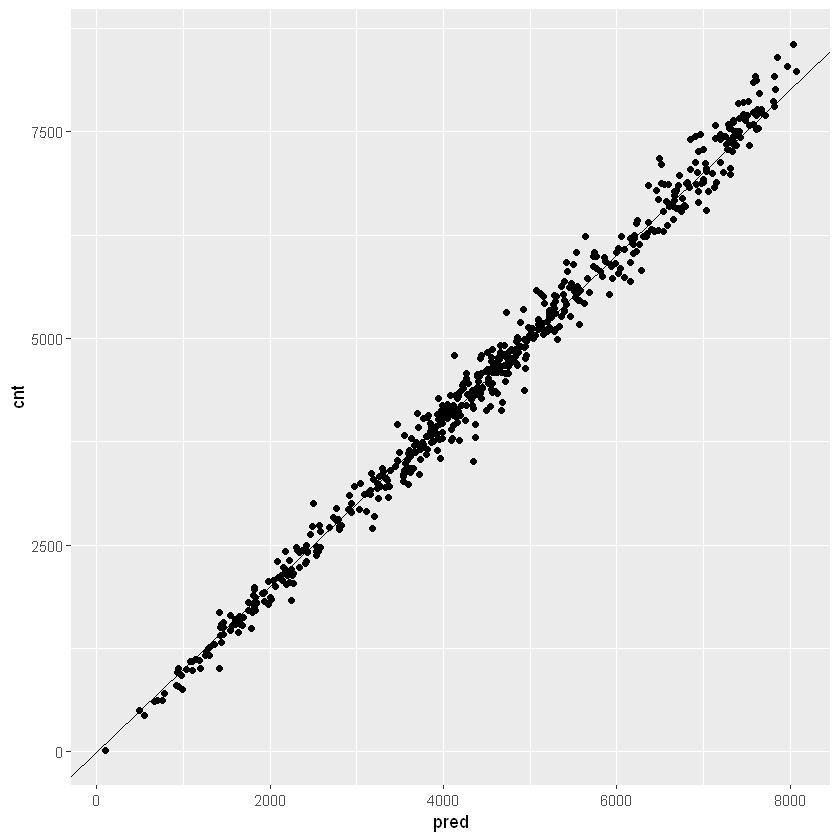

In [58]:
# Plot predictions vs actual bike rental count
ggplot(train_set, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

# Calculate RMSE
paste("Train accuracy: ", train_set %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2))))

[1] "Test Accuracy : 799.44967076786"

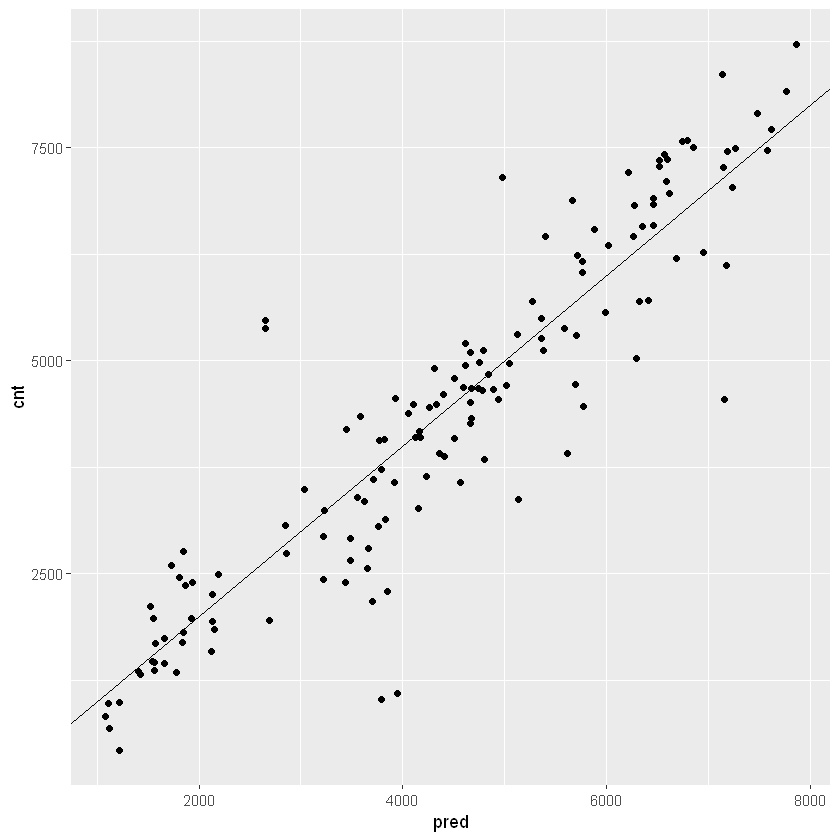

In [59]:
# Make predictions for test dataset
test_set$pred <- predict(bike_model_xgb, as.matrix(test_set.treat))

# Plot predictions vs actual bike rental count
ggplot(test_set, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

# Calculate RMSE for test_data
paste("Test Accuracy :", test_set %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2))))